<a href="https://colab.research.google.com/github/Remember63/AWS-Machine-Learning/blob/master/pyspark_demo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [155]:
import pyspark
from pyspark.sql import SparkSession
spark = SparkSession.builder.getOrCreate()
from pyspark.sql.types import *
from pyspark.sql.functions import lit, mean
from pyspark.sql import functions

import pandas as pd
import matplotlib.pyplot as plt


In [1]:
!pwd


/content


In [2]:
!ls

sample_data


In [3]:
!wget https://data.cityofchicago.org/api/views/ijzp-q8t2/rows.csv?accessType=DOWNLOAD

--2020-10-31 17:05:09--  https://data.cityofchicago.org/api/views/ijzp-q8t2/rows.csv?accessType=DOWNLOAD
Resolving data.cityofchicago.org (data.cityofchicago.org)... 52.206.140.199, 52.206.68.26, 52.206.140.205
Connecting to data.cityofchicago.org (data.cityofchicago.org)|52.206.140.199|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [text/csv]
Saving to: ‘rows.csv?accessType=DOWNLOAD’

rows.csv?accessType     [         <=>        ]   1.58G  3.16MB/s    in 8m 54s  

2020-10-31 17:14:04 (3.04 MB/s) - ‘rows.csv?accessType=DOWNLOAD’ saved [1702730945]



# Install Spark

```
# This is formatted as code
```



In [4]:
!apt-get update
!apt-get install openjdk-8-jdk-headless -qq > /dev/null
!wget -q http://archive.apache.org/dist/spark/spark-2.3.1/spark-2.3.1-bin-hadoop2.7.tgz
!tar xf spark-2.3.1-bin-hadoop2.7.tgz
!pip install -q findspark

import os
os.environ["JAVA_HOME"] = "/usr/lib/jvm/java-8-openjdk-amd64"
os.environ["SPARK_HOME"] = "/content/spark-2.3.1-bin-hadoop2.7"

Get:1 http://security.ubuntu.com/ubuntu bionic-security InRelease [88.7 kB]
Get:2 https://cloud.r-project.org/bin/linux/ubuntu bionic-cran40/ InRelease [3,626 B]
Ign:3 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  InRelease
Hit:4 http://ppa.launchpad.net/c2d4u.team/c2d4u4.0+/ubuntu bionic InRelease
Ign:5 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  InRelease
Get:6 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  Release [697 B]
Hit:7 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  Release
Get:8 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  Release.gpg [836 B]
Hit:9 http://archive.ubuntu.com/ubuntu bionic InRelease
Hit:10 http://ppa.launchpad.net/graphics-drivers/ppa/ubuntu bionic InRelease
Get:11 http://archive.ubuntu.com/ubuntu bionic-updates InRelease [88.7 kB]
Get:12 http://security.ubuntu.com/ubuntu bionic-security

In [5]:
import findspark
findspark.init()
from pyspark import SparkContext

sc = SparkContext.getOrCreate()
sc

import pyspark
from pyspark.sql import SparkSession
spark = SparkSession.builder.getOrCreate() 
spark


In [14]:
!ls

'rows.csv?accessType=DOWNLOAD'	 spark-2.3.1-bin-hadoop2.7
 sample_data			 spark-2.3.1-bin-hadoop2.7.tgz


### Rename the file somehow doesn't work

In [16]:
# !mv rows.csv\?accessType\=DOWNLOAD reported reported-crimes.csv

mv: target 'reported-crimes.csv' is not a directory


In [42]:
from pyspark.sql.functions import to_timestamp,col,lit
rc = spark.read.csv('rows.csv\?accessType\=DOWNLOAD',header=True).withColumn('Date',to_timestamp(col('Date'),'MM/dd/yyyy hh:mm:ss a')).filter(col('Date') <= lit('2018-11-11'))
rc.show(5)

+--------+-----------+-------------------+--------------------+----+-------------------+--------------------+--------------------+------+--------+----+--------+----+--------------+--------+------------+------------+----+--------------------+--------+---------+--------+
|      ID|Case Number|               Date|               Block|IUCR|       Primary Type|         Description|Location Description|Arrest|Domestic|Beat|District|Ward|Community Area|FBI Code|X Coordinate|Y Coordinate|Year|          Updated On|Latitude|Longitude|Location|
+--------+-----------+-------------------+--------------------+----+-------------------+--------------------+--------------------+------+--------+----+--------+----+--------------+--------+------------+------------+----+--------------------+--------+---------+--------+
|11034701|   JA366925|2001-01-01 11:00:00|     016XX E 86TH PL|1153| DECEPTIVE PRACTICE|FINANCIAL IDENTIT...|           RESIDENCE| false|   false|0412|     004|   8|            45|      11| 

# Schema

# New Section

In [28]:
labels = [       
 ('ID',StringType()),
 ('Case Number',StringType()),
 ('Date',TimestampType()),
 ('Block',StringType()),
 ('IUCR',StringType()),
 ('Primary Type',StringType()),
 ('Description',StringType()),
 ('Location Description',StringType()),
 ('Arrest',StringType()),
 ('Domestic',BooleanType()),
 ('Beat',StringType()),
 ('District',StringType()),
 ('Ward',StringType()),
 ('Community Area',StringType()),
 ('FBI Code',StringType()),
 ('X Coordinate',StringType()),
 ('Y Coordinate',StringType()),
 ('Year',IntegerType()),
 ('Updated On',StringType()),
 ('Latitude',DoubleType()),
 ('Longitude',DoubleType()),
 ('Location',StringType())
 ]

In [30]:
schema = StructType([StructField(x[0],x[1],True) for x in labels])
schema

StructType(List(StructField(ID,StringType,true),StructField(Case Number,StringType,true),StructField(Date,TimestampType,true),StructField(Block,StringType,true),StructField(IUCR,StringType,true),StructField(Primary Type,StringType,true),StructField(Description,StringType,true),StructField(Location Description,StringType,true),StructField(Arrest,StringType,true),StructField(Domestic,BooleanType,true),StructField(Beat,StringType,true),StructField(District,StringType,true),StructField(Ward,StringType,true),StructField(Community Area,StringType,true),StructField(FBI Code,StringType,true),StructField(X Coordinate,StringType,true),StructField(Y Coordinate,StringType,true),StructField(Year,IntegerType,true),StructField(Updated On,StringType,true),StructField(Latitude,DoubleType,true),StructField(Longitude,DoubleType,true),StructField(Location,StringType,true)))

In [40]:
rc1 = spark.read.csv('rows.csv\?accessType\=DOWNLOAD', schema = schema)
rc1.printSchema()

root
 |-- ID: string (nullable = true)
 |-- Case Number: string (nullable = true)
 |-- Date: timestamp (nullable = true)
 |-- Block: string (nullable = true)
 |-- IUCR: string (nullable = true)
 |-- Primary Type: string (nullable = true)
 |-- Description: string (nullable = true)
 |-- Location Description: string (nullable = true)
 |-- Arrest: string (nullable = true)
 |-- Domestic: boolean (nullable = true)
 |-- Beat: string (nullable = true)
 |-- District: string (nullable = true)
 |-- Ward: string (nullable = true)
 |-- Community Area: string (nullable = true)
 |-- FBI Code: string (nullable = true)
 |-- X Coordinate: string (nullable = true)
 |-- Y Coordinate: string (nullable = true)
 |-- Year: integer (nullable = true)
 |-- Updated On: string (nullable = true)
 |-- Latitude: double (nullable = true)
 |-- Longitude: double (nullable = true)
 |-- Location: string (nullable = true)



### Work with Columns

In [47]:
rc.select('Case Number','Date').show(5)
rc.withColumn('One', lit(1)).show(5)
rc2 = rc.drop('IUCR')
rc2.show(5)

+-----------+-------------------+
|Case Number|               Date|
+-----------+-------------------+
|   JA366925|2001-01-01 11:00:00|
|   JB147188|2017-10-08 03:00:00|
|   JB147595|2017-03-28 14:00:00|
|   JB147230|2017-09-09 20:17:00|
|   JB147599|2017-08-26 10:00:00|
+-----------+-------------------+
only showing top 5 rows

+--------+-----------+-------------------+--------------------+----+-------------------+--------------------+--------------------+------+--------+----+--------+----+--------------+--------+------------+------------+----+--------------------+--------+---------+--------+---+
|      ID|Case Number|               Date|               Block|IUCR|       Primary Type|         Description|Location Description|Arrest|Domestic|Beat|District|Ward|Community Area|FBI Code|X Coordinate|Y Coordinate|Year|          Updated On|Latitude|Longitude|Location|One|
+--------+-----------+-------------------+--------------------+----+-------------------+--------------------+------------

### Work with Rows

In [49]:
oneDay = spark.read.csv('rows.csv\?accessType\=DOWNLOAD',header=True).withColumn('Date',to_timestamp(col('Date'),'MM/dd/yyyy hh:mm:ss a')).filter(col('Date') == lit('2018-11-12'))
oneDay.show()

+--------+-----------+-------------------+-------------------+----+------------------+--------------------+--------------------+------+--------+----+--------+----+--------------+--------+------------+------------+----+--------------------+------------+-------------+--------------------+
|      ID|Case Number|               Date|              Block|IUCR|      Primary Type|         Description|Location Description|Arrest|Domestic|Beat|District|Ward|Community Area|FBI Code|X Coordinate|Y Coordinate|Year|          Updated On|    Latitude|    Longitude|            Location|
+--------+-----------+-------------------+-------------------+----+------------------+--------------------+--------------------+------+--------+----+--------+----+--------------+--------+------------+------------+----+--------------------+------------+-------------+--------------------+
|11505149|   JB513151|2018-11-12 00:00:00| 003XX S WHIPPLE ST|0810|             THEFT|           OVER $500|              STREET| false| 

In [51]:
rc.drop('One')
rc.union(oneDay).orderBy('Date',ascending= False).show(5)

+--------+-----------+-------------------+--------------------+----+-------------------+--------------------+--------------------+------+--------+----+--------+----+--------------+--------+------------+------------+----+--------------------+------------+-------------+--------------------+
|      ID|Case Number|               Date|               Block|IUCR|       Primary Type|         Description|Location Description|Arrest|Domestic|Beat|District|Ward|Community Area|FBI Code|X Coordinate|Y Coordinate|Year|          Updated On|    Latitude|    Longitude|            Location|
+--------+-----------+-------------------+--------------------+----+-------------------+--------------------+--------------------+------+--------+----+--------+----+--------------+--------+------------+------------+----+--------------------+------------+-------------+--------------------+
|11505149|   JB513151|2018-11-12 00:00:00|  003XX S WHIPPLE ST|0810|              THEFT|           OVER $500|              STREET|

In [53]:
rc.groupBy('Primary Type').count().orderBy('count',ascending=False).show()

+--------------------+-------+
|        Primary Type|  count|
+--------------------+-------+
|               THEFT|1418441|
|             BATTERY|1232228|
|     CRIMINAL DAMAGE| 771499|
|           NARCOTICS| 711744|
|       OTHER OFFENSE| 418857|
|             ASSAULT| 418508|
|            BURGLARY| 388031|
| MOTOR VEHICLE THEFT| 314131|
|  DECEPTIVE PRACTICE| 266020|
|             ROBBERY| 255599|
|   CRIMINAL TRESPASS| 193370|
|   WEAPONS VIOLATION|  70662|
|        PROSTITUTION|  68329|
|PUBLIC PEACE VIOL...|  47785|
|OFFENSE INVOLVING...|  45871|
| CRIM SEXUAL ASSAULT|  26870|
|         SEX OFFENSE|  25346|
|INTERFERENCE WITH...|  15140|
|            GAMBLING|  14422|
|LIQUOR LAW VIOLATION|  14067|
+--------------------+-------+
only showing top 20 rows



### Challenge

In [61]:
rc.filter(col('Arrest')=='true').count()/rc.count()

0.27754332498562606

In [62]:
rc.filter(col('Arrest')=='true').count()/rc.select('Arrest').count()

0.27754332498562606

In [58]:
rc.groupBy('Location Description').count().orderBy('count',ascending=False).show()
rc.groupBy('Location').count().orderBy('count',ascending=False).show()

+--------------------+-------+
|Location Description|  count|
+--------------------+-------+
|              STREET|1770575|
|           RESIDENCE|1144944|
|           APARTMENT| 698329|
|            SIDEWALK| 665552|
|               OTHER| 256793|
|PARKING LOT/GARAG...| 193763|
|               ALLEY| 150911|
|SCHOOL, PUBLIC, B...| 142316|
|    RESIDENCE-GARAGE| 131607|
|  SMALL RETAIL STORE| 119269|
|RESIDENCE PORCH/H...| 117902|
|VEHICLE NON-COMME...| 108435|
|          RESTAURANT| 105608|
|  GROCERY FOOD STORE|  87301|
|    DEPARTMENT STORE|  83663|
|         GAS STATION|  71985|
|RESIDENTIAL YARD ...|  69451|
|CHA PARKING LOT/G...|  55452|
|       PARK PROPERTY|  52340|
|COMMERCIAL / BUSI...|  49175|
+--------------------+-------+
only showing top 20 rows

+--------------------+-----+
|            Location|count|
+--------------------+-----+
|                null|66287|
|(41.976290414, -8...|13114|
|(41.754592961, -8...| 9432|
|(41.883500187, -8...| 6933|
|(41.897895128, -8...| 4287

### Build-in Functions

In [65]:
from pyspark.sql.functions import lower, upper, substring
help(substring)

Help on function substring in module pyspark.sql.functions:

substring(str, pos, len)
    Substring starts at `pos` and is of length `len` when str is String type or
    returns the slice of byte array that starts at `pos` in byte and is of length `len`
    when str is Binary type.
    
    .. note:: The position is not zero based, but 1 based index.
    
    >>> df = spark.createDataFrame([('abcd',)], ['s',])
    >>> df.select(substring(df.s, 1, 2).alias('s')).collect()
    [Row(s='ab')]
    
    .. versionadded:: 1.5



In [67]:
rc.select(lower(col('Primary Type')),upper(col('Primary Type')),substring((col('Primary Type')),1,4)).show(5)

+-------------------+-------------------+-----------------------------+
|lower(Primary Type)|upper(Primary Type)|substring(Primary Type, 1, 4)|
+-------------------+-------------------+-----------------------------+
| deceptive practice| DECEPTIVE PRACTICE|                         DECE|
|crim sexual assault|CRIM SEXUAL ASSAULT|                         CRIM|
|           burglary|           BURGLARY|                         BURG|
|              theft|              THEFT|                         THEF|
|crim sexual assault|CRIM SEXUAL ASSAULT|                         CRIM|
+-------------------+-------------------+-----------------------------+
only showing top 5 rows



In [68]:
from pyspark.sql.functions import min, max

In [70]:
rc.select(min(col('Date')),max(col('Date'))).show()

+-------------------+-------------------+
|          min(Date)|          max(Date)|
+-------------------+-------------------+
|2001-01-01 00:00:00|2018-11-10 23:55:00|
+-------------------+-------------------+



In [71]:
from pyspark.sql.functions import date_add, date_sub

In [73]:
rc.select(date_add(min(col('Date')), 3), date_sub(max(col('Date')), 3)).show()

+----------------------+----------------------+
|date_add(min(Date), 3)|date_sub(max(Date), 3)|
+----------------------+----------------------+
|            2001-01-04|            2018-11-07|
+----------------------+----------------------+



In [78]:
rc.select(col('Date')).describe()

DataFrame[summary: string]

### Working with Dates

In [79]:
from pyspark.sql.functions import to_date, to_timestamp, lit

In [94]:
df = spark.createDataFrame([('2020-12-25 13:30:00',)],['Christmas'])
df.show(1, truncate = False)
df.select(to_date(col('Christmas'), 'yyyy-MM-dd HH:mm:ss'), to_timestamp(col('Christmas'),'yyyy-MM-dd HH:mm:ss')).show()

+-------------------+
|Christmas          |
+-------------------+
|2020-12-25 13:30:00|
+-------------------+

+-------------------------------------------+------------------------------------------------+
|to_date(`Christmas`, 'yyyy-MM-dd HH:mm:ss')|to_timestamp(`Christmas`, 'yyyy-MM-dd HH:mm:ss')|
+-------------------------------------------+------------------------------------------------+
|                                 2020-12-25|                             2020-12-25 13:30:00|
+-------------------------------------------+------------------------------------------------+



In [93]:
df1 = spark.createDataFrame([('12/25/2020 01:30:00 PM',)],['Christmas'])
df1.show()
df1.select(to_date(col('Christmas'), 'MM/dd/yyyy hh:mm:ss aa'), to_timestamp(col('Christmas'), 'MM/dd/yyyy hh:mm:ss aa')).show()

+--------------------+
|           Christmas|
+--------------------+
|12/25/2020 01:30:...|
+--------------------+

+----------------------------------------------+---------------------------------------------------+
|to_date(`Christmas`, 'MM/dd/yyyy hh:mm:ss aa')|to_timestamp(`Christmas`, 'MM/dd/yyyy hh:mm:ss aa')|
+----------------------------------------------+---------------------------------------------------+
|                                    2020-12-25|                                2020-12-25 13:30:00|
+----------------------------------------------+---------------------------------------------------+



### User-defined Functions (udf)

### Working with Joins

In [97]:
!wget police-station.csv https://data.cityofchicago.org/api/views/z8bn-74gv/rows.csv?accessType=DOWNLOAD
!ls -1

--2020-10-31 20:18:07--  http://police-station.csv/
Resolving police-station.csv (police-station.csv)... failed: Name or service not known.
wget: unable to resolve host address ‘police-station.csv’
--2020-10-31 20:18:07--  https://data.cityofchicago.org/api/views/z8bn-74gv/rows.csv?accessType=DOWNLOAD
Resolving data.cityofchicago.org (data.cityofchicago.org)... 52.206.140.199, 52.206.140.205, 52.206.68.26
Connecting to data.cityofchicago.org (data.cityofchicago.org)|52.206.140.199|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [text/csv]
Saving to: ‘rows.csv?accessType=DOWNLOAD.2’

rows.csv?accessType     [ <=>                ]   5.57K  --.-KB/s    in 0s      

2020-10-31 20:18:08 (470 MB/s) - ‘rows.csv?accessType=DOWNLOAD.2’ saved [5699]

FINISHED --2020-10-31 20:18:08--
Total wall clock time: 0.4s
Downloaded: 1 files, 5.6K in 0s (470 MB/s)
'rows.csv?accessType=DOWNLOAD'
'rows.csv?accessType=DOWNLOAD.1'
'rows.csv?accessType=DOWNLOAD.2'
sample_dat

In [164]:
ps = spark.read.csv('rows.csv?accessType=DOWNLOAD.2', header=True)
ps.show(4)

+--------+--------------+--------------------+-------+-----+-----+--------------------+------------+------------+------------+------------+------------+-----------+------------+--------------------+
|DISTRICT| DISTRICT NAME|             ADDRESS|   CITY|STATE|  ZIP|             WEBSITE|       PHONE|         FAX|         TTY|X COORDINATE|Y COORDINATE|   LATITUDE|   LONGITUDE|            LOCATION|
+--------+--------------+--------------------+-------+-----+-----+--------------------+------------+------------+------------+------------+------------+-----------+------------+--------------------+
|       1|       Central|     1718 S State St|Chicago|   IL|60616|http://home.chica...|312-745-4290|312-745-3694|312-745-3693| 1176569.052| 1891771.704|41.85837259|-87.62735617|(41.8583725929, -...|
|       6|       Gresham|   7808 S Halsted St|Chicago|   IL|60620|http://home.chica...|312-745-3617|312-745-3649|312-745-3639| 1172283.013| 1853022.646|41.75213684|-87.64422891|(41.7521368378, -...|
|    

In [99]:
rc.cache()
rc.count()

6753551

In [101]:
rc.select('District').distinct().show(5)

+--------+
|District|
+--------+
|     009|
|     012|
|     024|
|    null|
|     031|
+--------+
only showing top 5 rows



In [103]:
ps.select('DISTRICT').distinct().show(5)

+--------+
|DISTRICT|
+--------+
|       7|
|      15|
|      11|
|       3|
|       8|
+--------+
only showing top 5 rows



In [104]:
from pyspark.sql.functions import lpad

In [105]:
ps.select(lpad(col('DISTRICT'), 3,'0')).show(5)

+--------------------+
|lpad(DISTRICT, 3, 0)|
+--------------------+
|                 001|
|                 006|
|                 011|
|                 016|
|                 Hea|
+--------------------+
only showing top 5 rows



In [106]:
ps = ps.withColumn('Format_district',lpad(col('DISTRICT'), 3,'0'))
ps.show(5)

+------------+--------------+--------------------+-------+-----+-----+--------------------+------------+------------+------------+------------+------------+-----------+------------+--------------------+---------------+
|    DISTRICT| DISTRICT NAME|             ADDRESS|   CITY|STATE|  ZIP|             WEBSITE|       PHONE|         FAX|         TTY|X COORDINATE|Y COORDINATE|   LATITUDE|   LONGITUDE|            LOCATION|Format_district|
+------------+--------------+--------------------+-------+-----+-----+--------------------+------------+------------+------------+------------+------------+-----------+------------+--------------------+---------------+
|           1|       Central|     1718 S State St|Chicago|   IL|60616|http://home.chica...|312-745-4290|312-745-3694|312-745-3693| 1176569.052| 1891771.704|41.85837259|-87.62735617|(41.8583725929, -...|            001|
|           6|       Gresham|   7808 S Halsted St|Chicago|   IL|60620|http://home.chica...|312-745-3617|312-745-3649|312-745

In [109]:
ps.columns

['DISTRICT',
 'DISTRICT NAME',
 'ADDRESS',
 'CITY',
 'STATE',
 'ZIP',
 'WEBSITE',
 'PHONE',
 'FAX',
 'TTY',
 'X COORDINATE',
 'Y COORDINATE',
 'LATITUDE',
 'LONGITUDE',
 'LOCATION',
 'Format_district']

In [110]:
rc.join(ps, rc.District == ps.Format_district, 'left_outer').drop('ADDRESS',
 'CITY',
 'STATE',
 'ZIP',
 'WEBSITE',
 'PHONE',
 'FAX',
 'TTY',
 'X COORDINATE',
 'Y COORDINATE',
 'LATITUDE',
 'LONGITUDE',
 'LOCATION').show()

+--------+-----------+-------------------+--------------------+----+--------------------+--------------------+--------------------+------+--------+----+--------+----+--------------+--------+----+--------------------+--------+--------------+---------------+
|      ID|Case Number|               Date|               Block|IUCR|        Primary Type|         Description|Location Description|Arrest|Domestic|Beat|District|Ward|Community Area|FBI Code|Year|          Updated On|DISTRICT| DISTRICT NAME|Format_district|
+--------+-----------+-------------------+--------------------+----+--------------------+--------------------+--------------------+------+--------+----+--------+----+--------------+--------+----+--------------------+--------+--------------+---------------+
|11034701|   JA366925|2001-01-01 11:00:00|     016XX E 86TH PL|1153|  DECEPTIVE PRACTICE|FINANCIAL IDENTIT...|           RESIDENCE| false|   false|0412|     004|   8|            45|      11|2001|08/05/2017 03:50:...|       4| Sou

### Challenge

In [135]:
rc.select(col('Primary Type')).distinct().orderBy(col('Primary Type')).show(30, truncate = False)

+---------------------------------+
|Primary Type                     |
+---------------------------------+
|ARSON                            |
|ASSAULT                          |
|BATTERY                          |
|BURGLARY                         |
|CONCEALED CARRY LICENSE VIOLATION|
|CRIM SEXUAL ASSAULT              |
|CRIMINAL DAMAGE                  |
|CRIMINAL SEXUAL ASSAULT          |
|CRIMINAL TRESPASS                |
|DECEPTIVE PRACTICE               |
|DOMESTIC VIOLENCE                |
|GAMBLING                         |
|HOMICIDE                         |
|HUMAN TRAFFICKING                |
|INTERFERENCE WITH PUBLIC OFFICER |
|INTIMIDATION                     |
|KIDNAPPING                       |
|LIQUOR LAW VIOLATION             |
|MOTOR VEHICLE THEFT              |
|NARCOTICS                        |
|NON - CRIMINAL                   |
|NON-CRIMINAL                     |
|NON-CRIMINAL (SUBJECT SPECIFIED) |
|OBSCENITY                        |
|OFFENSE INVOLVING CHILDREN 

In [132]:
rc.filter(rc['Primary Type'].like('%NON%CRIMINAL%')).groupBy('Description').count().orderBy(col('count'), ascending=False).show(5, truncate = False)

+-------------------------------------------+-----+
|Description                                |count|
+-------------------------------------------+-----+
|LOST PASSPORT                              |107  |
|FOID - REVOCATION                          |75   |
|NOTIFICATION OF CIVIL NO CONTACT ORDER     |9    |
|NOTIFICATION OF STALKING - NO CONTACT ORDER|8    |
|CONCEALED CARRY LICENSE REVOCATION         |5    |
+-------------------------------------------+-----+
only showing top 5 rows



In [137]:
rc.filter((col('Primary Type')=='NON - CRIMINAL') | (col('Primary Type')=='NON-CRIMINAL') | (col('Primary Type')=='NON-CRIMINAL (SUBJECT SPECIFIED)') ).groupBy('Description').count().orderBy(col('count'), ascending=False).show(5, truncate = False)

+-------------------------------------------+-----+
|Description                                |count|
+-------------------------------------------+-----+
|LOST PASSPORT                              |107  |
|FOID - REVOCATION                          |75   |
|NOTIFICATION OF CIVIL NO CONTACT ORDER     |9    |
|NOTIFICATION OF STALKING - NO CONTACT ORDER|8    |
|CONCEALED CARRY LICENSE REVOCATION         |5    |
+-------------------------------------------+-----+
only showing top 5 rows



In [146]:
from pyspark.sql.functions import dayofweek, date_format
help(date_format)

Help on function date_format in module pyspark.sql.functions:

date_format(date, format)
    Converts a date/timestamp/string to a value of string in the format specified by the date
    format given by the second argument.
    
    A pattern could be for instance `dd.MM.yyyy` and could return a string like '18.03.1993'. All
    pattern letters of the Java class `java.text.SimpleDateFormat` can be used.
    
    .. note:: Use when ever possible specialized functions like `year`. These benefit from a
        specialized implementation.
    
    >>> df = spark.createDataFrame([('2015-04-08',)], ['dt'])
    >>> df.select(date_format('dt', 'MM/dd/yyy').alias('date')).collect()
    [Row(date='04/08/2015')]
    
    .. versionadded:: 1.5



In [147]:
rc = rc.withColumn('Day of Week',dayofweek(col('Date')))
rc = rc.withColumn('Day of Week in Text',date_format(col('Date'), 'E'))

In [148]:
rc.show(5)

+--------+-----------+-------------------+--------------------+----+-------------------+--------------------+--------------------+------+--------+----+--------+----+--------------+--------+------------+------------+----+--------------------+--------+---------+--------+-----------+-------------------+
|      ID|Case Number|               Date|               Block|IUCR|       Primary Type|         Description|Location Description|Arrest|Domestic|Beat|District|Ward|Community Area|FBI Code|X Coordinate|Y Coordinate|Year|          Updated On|Latitude|Longitude|Location|Day of Week|Day of Week in Text|
+--------+-----------+-------------------+--------------------+----+-------------------+--------------------+--------------------+------+--------+----+--------+----+--------------+--------+------------+------------+----+--------------------+--------+---------+--------+-----------+-------------------+
|11034701|   JA366925|2001-01-01 11:00:00|     016XX E 86TH PL|1153| DECEPTIVE PRACTICE|FINANC

In [149]:
rc.groupBy('Day of Week in Text').count().orderBy(col('count'),ascending=False).show(7)

+-------------------+-------+
|Day of Week in Text|  count|
+-------------------+-------+
|                Fri|1016999|
|                Wed| 973928|
|                Tue| 968065|
|                Sat| 965204|
|                Thu| 964594|
|                Mon| 952771|
|                Sun| 911990|
+-------------------+-------+



In [153]:
dow = [x[0] for x in rc.groupBy('Day of Week in Text').count().collect()]
dow
cnt = [x[1] for x in rc.groupBy('Day of Week in Text').count().collect()]
cnt

[911990, 952771, 964594, 965204, 973928, 968065, 1016999]

In [156]:
fp = pd.DataFrame({'day of week': dow, 'crime count': cnt})
fp

,day of week,crime count
0,Sun,911990
1,Mon,952771
2,Thu,964594
3,Sat,965204
4,Wed,973928
5,Tue,968065
6,Fri,1016999


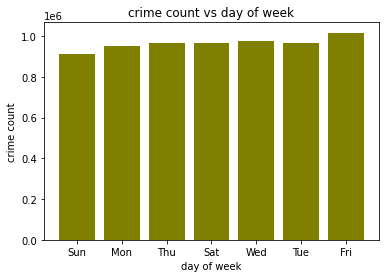

In [159]:
plt.bar(fp['day of week'],fp['crime count'], color = 'olive')
plt.xlabel('day of week')
plt.ylabel('crime count')
plt.title('crime count vs day of week')
plt.show()


### Working with RDDs

In [161]:
psrdd = sc.textFile('rows.csv?accessType=DOWNLOAD.2')
ps_header = psrdd.first()
ps_rest = psrdd.filter(lambda line: line != ps_header)

In [162]:
ps_rest.map(lambda line: line.split(',')).count()

24

In [171]:
(ps_rest.filter(lambda line: (line.split(',')[0] == '7').
  map(lambda line: (line.split(',')[0],
                    line.split(',')[1],
                    line.split(',')[2],
                    line.split(',')[5]
                    )).collect()) 
              

SyntaxError: ignored

In [173]:
(ps_rest.filter(lambda line: (line.split(',')[0] in ['10', '11']).
  map(lambda line: (line.split(',')[1],
                    line.split(',')[2],
                    line.split(',')[5])).collect())

SyntaxError: ignored